In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [4]:
def my_func(x):
    return 1.0+0.3*x+0.15*np.power(x,2)+np.random.normal(0,1)

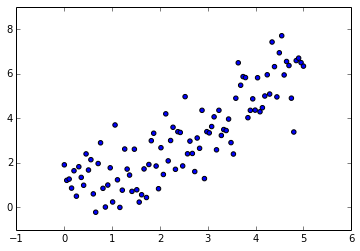

In [94]:
#### generate sample

x_ax = np.linspace(0,5,100)
y_ax = map(my_func,x_ax)
plt.scatter(x_ax,y_ax)
plt.show()

In [171]:
def calculate_likelihood(_z,_beta,_alpha):
    hey =0.0
    hey2 = []
    for i,j in enumerate(_z):
        hoge = [_beta[k]*np.power(_alpha[i],k) for k in range(len(_beta))]
        hey2.append(np.sum(hoge))
        hey = hey + np.power(j - np.sum(hoge),2)
    return -0.5*hey,hey2

def calculate_tran(_beta):
    x = [st.norm.pdf(i,0,1) for i in _beta]
    ccc = np.log(np.prod(np.array(x)))
    return ccc

-60.9696854589


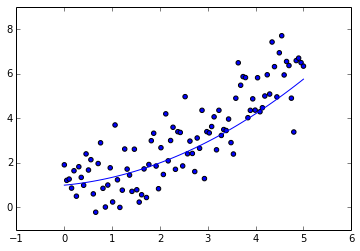

In [153]:
a, b = calculate_likelihood(y_ax,[1.0,0.2,0.15],x_ax)
print a
plt.plot(x_ax,b)
plt.scatter(x_ax,y_ax)
plt.show()

In [238]:
now_n = 1
now_beta = [0.5,-0.0,0.2]
now_judger = calculate_tran(now_beta)
now_likehood =  calculate_likelihood(y_ax,now_beta,x_ax)[0]
print now_likehood

beta_list = []
for i in range(3000):
    hoge = np.random.multinomial(1,[1.0/3,1.0/3,1-2.0/3])
    new_n =  [ i for i in range(3) if hoge[i]==1][0]+1
    new_beta = [np.random.normal(0,1) for i in range(new_n)]
    new_judger = calculate_tran(new_beta)
    new_likelihood = calculate_likelihood(y_ax,new_beta,x_ax)[0]
    alpha = np.min([np.exp(new_likelihood+now_judger-now_likehood-new_judger),1.0])
    if alpha>u:
        now_beta = new_beta
        now_judger = new_judger
        now_likehood = new_likelihood
    beta_list.append(now_beta)

second_list = []
third_list = []
for i in beta_list:
    if len(i)==2:
        second_list.append(i)
    elif len(i)==3:
        third_list.append(i)

print "second_degree_list_length ",len(second_list)
print "third_degree_list_length ",len(third_list)

print np.mean(second_list,0)
print np.mean(third_list,0)
###print third_list
a1,a2 = calculate_likelihood(y_ax,np.mean(second_list,0),x_ax)
b1,b2 = calculate_likelihood(y_ax,np.mean(third_list,0),x_ax)

-97.6155005348
second_degree_list_length  298
third_degree_list_length  2702
[ 0.50919743  1.10584362]
[ 0.80786765 -0.01452407  0.25858822]


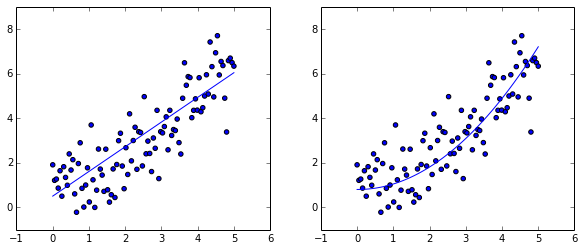

In [239]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_ax,a2)
plt.scatter(x_ax,y_ax)
plt.subplot(1,2,2)
plt.plot(x_ax,b2)
plt.scatter(x_ax,y_ax)
plt.show()